In [1]:
# il file MOE_GRID_1078_SCALED_MOE.csv lo ho ottenuto a partire dal file base MOE_GRID_1078.xlsx( vedere inizio foglio descriptors_MOE_SCALED_GRID_NOT_SCALED_scale_false )
import pandas as pd
file = './data/MOE_GRID_1078_SCALED_MOE.csv'
file_read = pd.read_csv(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UNIQUEID,SMILE,SETID,LOGD,mol,GRID_DESCRIPTOR,0,...,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,SMR_VSA1,SMR_VSA6,TPSA,vsa_acc,vsa_other,vsa_pol,weinerPol
0,0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,1 0 0 0 0 0 0 0 ...,1.729811,...,1.274734,1.126473,0.109594,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.242571
1,1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,1 0 0 0 0 0 0 0 ...,0.224985,...,0.248713,-0.691608,-0.632522,-1.013442,0.273703,-0.366801,0.536315,-0.700811,-0.211249,-0.207889
2,2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,1 0 0 0 0 0 0 0 ...,0.751230,...,0.469541,-0.934320,-0.261464,-0.191134,0.028732,-0.338885,-0.526052,-0.942893,-0.101940,-1.165116
3,3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,1 0 0 0 0 0 0 0 ...,2.234495,...,1.274734,1.369185,-0.632522,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.693031
4,4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,1 0 0 0 0 0 0 0 ...,1.050557,...,0.411323,-0.934320,-0.261464,-1.065763,0.094885,-0.117799,0.255160,-0.344628,0.104998,-0.939886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,1 0 0 0 0 0 0 0 ...,-1.447175,...,-0.124774,-0.691608,-0.632522,0.080212,-0.106998,-0.819441,-1.163093,-1.333675,-0.791938,-0.996194
1074,1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,1 0 0 0 0 0 0 0 ...,-0.576575,...,1.170341,-0.934320,0.109594,0.848887,1.338626,0.714700,0.560892,0.506076,0.243471,0.467801
1075,1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,O=C1Oc2c(cccc2)C=C1,1 0 0 0 0 0 0 0 ...,0.428894,...,-1.046402,-0.691608,-0.285559,-0.794416,-0.440550,-1.198053,-0.526052,-0.538473,-1.090054,-1.390346
1076,1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,1 0 0 0 0 0 0 0 ...,-0.740039,...,-1.046402,-0.691608,-0.632522,-0.025187,-1.001106,0.059668,-0.222298,0.328642,0.394279,-1.221424


In [2]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


[0.21791715 0.1120733  0.07017583 0.05948068 0.04559008 0.03779031
 0.0333575  0.0272078  0.02128133 0.02119042 0.01913998 0.01596359
 0.01447954 0.01396863 0.01283914 0.01176048 0.01137346 0.01070085
 0.01000079 0.00895763 0.00814463 0.00735478 0.0068488  0.0063962
 0.00568802 0.00563717 0.00544741 0.00485086 0.00471759 0.00448248
 0.00438164 0.00432047 0.00421384 0.00395037 0.00362344 0.00355869
 0.00331049 0.00307111 0.00295472 0.00276875 0.00273677 0.00263654
 0.00255514 0.00250754 0.00239496 0.00223176 0.00212823 0.00209826
 0.00200415 0.00197494 0.00189694 0.00185358 0.0017501  0.00174007
 0.0016748 ]


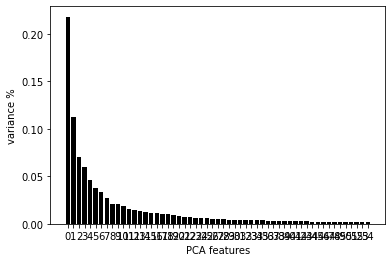

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=55)
principalComponents = pca.fit_transform(X["GM"])
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [4]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385628,-3.797450,-0.205515,0.577468,2.650235,2.107584,-0.507962,-1.988272,-0.272682,1.292063,...,0.141305,0.236339,0.131623,-0.017713,-0.307821,-0.138312,0.788800,0.177449,0.039276,-0.266107
1,-1.852267,-0.967470,1.521799,-2.190522,1.602440,-1.351195,-0.842831,-2.400753,2.772700,-0.622955,...,0.159134,0.145090,-0.297836,-0.346373,0.562800,-0.086348,-0.213080,-0.517543,0.122030,-0.265047
2,-3.337043,-3.978068,0.821395,-1.131030,-0.451054,1.285466,1.379637,-0.724121,-0.555809,1.270822,...,-0.028480,0.159235,0.077930,0.180088,0.075993,0.157744,-0.087735,0.005023,-0.086035,-0.227684
3,-0.253895,-0.667602,0.210576,1.674015,2.559883,3.029479,0.154352,-1.241352,0.541401,0.903706,...,0.127202,0.130669,0.133072,0.300869,-0.478170,-0.189967,0.570978,-0.017367,0.252015,-0.286002
4,-1.922622,-4.428363,1.265089,0.316525,-0.389950,1.273411,2.171385,-1.398246,-0.092055,0.865351,...,-0.197037,-0.048048,0.052795,0.032789,0.013283,-0.155319,0.115728,0.114858,-0.431107,-0.020568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-2.148289,-0.223120,-0.461049,-2.137237,-1.346175,0.538462,1.127670,1.086609,0.661684,0.514355,...,0.110165,-0.204385,-0.394928,0.117572,-0.318117,0.105317,-0.423976,0.897538,0.210899,0.225783
1074,1.624281,-3.297367,1.289536,-1.760202,2.810553,1.727617,-2.237323,-1.001370,-1.300991,-0.158205,...,0.212368,-0.344200,-0.162606,-0.544421,-0.009265,-0.046818,-0.200643,0.236340,-0.519330,0.002939
1075,-4.973996,-1.083797,-0.892020,0.877158,-0.985322,0.842784,-0.448580,0.093925,0.040904,-0.102417,...,0.024654,-0.097222,0.000648,-0.028733,0.261720,-0.117089,0.009238,0.166141,-0.021455,-0.132724
1076,-3.509222,-1.279654,0.934532,0.395040,-1.104419,-0.579890,-0.543524,0.658254,-1.447212,-0.528566,...,-0.275759,0.360410,0.279326,0.036598,-0.377224,-0.085791,-0.553004,0.029976,0.430102,0.486340


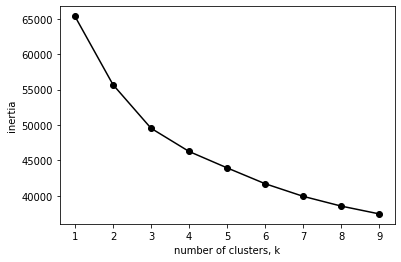

In [5]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:53])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [6]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:53].values

y_km = model.fit(X_01)

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])

c2 = np.asarray(clusters[1])


c3 = np.asarray(clusters[2])

In [7]:
print(len(c1))
print(len(c2))
print(len(c3))

43
324
711


In [8]:
for idx , l in enumerate(y_km.labels_):
    print( idx, l )

0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 1
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 0
83 2
84 2
85 1
86 2
87 1
88 1
89 1
90 2
91 2
92 2
93 1
94 2
95 1
96 1
97 2
98 2
99 1
100 2
101 1
102 1
103 2
104 2
105 1
106 1
107 2
108 1
109 1
110 2
111 2
112 2
113 1
114 1
115 2
116 2
117 2
118 2
119 2
120 2
121 2
122 2
123 2
124 1
125 2
126 2
127 1
128 2
129 2
130 2
131 2
132 2
133 1
134 1
135 2
136 2
137 2
138 2
139 2
140 1
141 2
142 1
143 2
144 2
145 1
146 2
147 2
148 2
149 1
150 1
151 1
152 2
153 2
154 1
155 2
156 2
157 1
158 2
159 2
160 1
161 1
162 2
163 2
164 2
165 1
166 2
167 1
168 2
169 1
170 2
171 1
172 2
173 2
174 2
175 2
176 2
177 2
178 2
179 2
180 1
181 2
182 1
183 1
184 1


In [9]:
file_NON_SCALATO = 'data/MOE_GRID_1078.xlsx'
file_NON_SCALATO_read = pd.read_excel( file_NON_SCALATO )
file_NON_SCALATO_dataframe = pd.DataFrame( file_NON_SCALATO_read )
file_NON_SCALATO_dataframe

,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [10]:
%%time
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_NON_SCALATO_read["UNIQUEID"]):
    
    fdesc = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)
CPU times: user 11.4 s, sys: 159 ms, total: 11.6 s
Wall time: 11.6 s


In [11]:
indici_cluster_ZERO = []
indici_cluster_UNO = []
indici_cluster_DUE = []


for cont, num in enumerate (y_km.labels_) :
    if num==0 :
        indici_cluster_ZERO.append( cont )
    elif num==1 :
        indici_cluster_UNO.append( cont )
    elif num==2 :
        indici_cluster_DUE.append( cont )
        
print(len(indici_cluster_ZERO))
print(len(indici_cluster_UNO))
print(len(indici_cluster_DUE))

43
324
711


In [12]:
SETID_value = file_NON_SCALATO_dataframe['SETID']

SETID_ZERO = []
SETID_UNO = []
SETID_DUE = [] 


for ind in indici_cluster_ZERO :
    SETID_ZERO.append(SETID_value[ind])
    
SETID_UNO = []
for ind in indici_cluster_UNO :
    SETID_UNO.append(SETID_value[ind])
    
SETID_DUE = []
for ind in indici_cluster_DUE :
    SETID_DUE.append(SETID_value[ind])
    

In [13]:
Y_GM_0 = []

Y_GM_1 = []

Y_GM_2 = []


for idx, y in enumerate (Y['GM']) :
    if idx in indici_cluster_ZERO :
        Y_GM_0.append( y )
    elif idx in indici_cluster_UNO :
        Y_GM_1.append( y )
    elif idx in indici_cluster_DUE :
        Y_GM_2.append( y )
        
print("Y_GM_0 :\n", Y_GM_0)
print("Y_GM_1 :\n", Y_GM_1)
print("Y_GM_2 :\n", Y_GM_2)
        

Y_GM_0 :
 [0.2, 2.1, 2.42, -1.33, 2.8, 3.4, 3.7, 3.9, 4.0, 4.22, 4.3, 4.3, 4.3, 4.38, 4.5, 4.6, 4.7, 4.8, 4.85, 2.8, 3.5, 4.4, 3.6, 4.07, 3.8, 4.11, 3.5, 4.3, 4.2, 4.5, 4.4, 4.2, 4.0, 2.8, 3.3, 3.5, 3.2, 0.45, 1.92, -1.95, 0.98, 1.14, 0.33]
Y_GM_1 :
 [-0.5, 0.25, -2.59, 0.3, 0.3, 0.37, 0.4, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.14, 1.17, 1.18, 1.2, 1.21, 1.22, 1.25, 1.3, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.6, 1.61, 1.63, 1.64, 1.64, 1.68, 1.69, 1.7, 1.76, 1.79, 1.85, 1.87, 1.95, 2.03, 2.07, 2.1, 2.1, 2.1, 2.1, 2.17, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.4, 2.41, 2.49, 2.5, 2.5, -1.38, 2.59, 2.6, 2.6, 2.64, 2.64, 2.7, 2.7, 2.71, 2.75, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 5.39, 3.65, 3.7, 3.7, 3.7, 3.7, 3.71, 3.74, 3.77, 3.81, 3.81, 4.02, 4.02, 4

In [14]:
Y_GM_0_TR = []
Y_GM_0_TE = []

for idx, y_0 in enumerate (Y_GM_0) :
    if SETID_ZERO[idx]==("Tr") :
        Y_GM_0_TR.append( y_0 )
    elif SETID_ZERO[idx]==("Te") :
        Y_GM_0_TE.append( y_0 )
        
print(Y_GM_0_TR)
print(Y_GM_0_TE)

[0.2, 2.1, 2.42, 3.4, 3.7, 3.9, 4.22, 4.3, 4.3, 4.38, 4.6, 4.7, 4.85, 2.8, 3.6, 4.07, 3.8, 4.11, 3.5, 4.3, 4.2, 4.5, 4.4, 4.2, 4.0, 2.8, 3.3, 3.5, 3.2, 0.45, 1.92, -1.95, 0.98, 1.14, 0.33]
[-1.33, 2.8, 4.0, 4.3, 4.5, 4.8, 3.5, 4.4]


In [15]:
Y_GM_1_TR = []
Y_GM_1_TE = []

for idx, y_1 in enumerate (Y_GM_1) :
    if SETID_UNO[idx]==("Tr") :
        Y_GM_1_TR.append( y_1 )
    elif SETID_UNO[idx]==("Te") :
        Y_GM_1_TE.append( y_1 )
        
print(Y_GM_1_TR)
print(Y_GM_1_TE)

[-0.5, 0.25, -2.59, 0.3, 0.37, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.17, 1.18, 1.2, 1.21, 1.25, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.61, 1.63, 1.64, 1.68, 1.69, 1.79, 1.87, 1.95, 2.07, 2.1, 2.1, 2.1, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.41, 2.49, 2.5, 2.5, 2.59, 2.6, 2.6, 2.64, 2.7, 2.7, 2.71, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 3.7, 3.7, 3.7, 3.7, 3.74, 3.77, 3.81, 4.02, 4.02, 4.03, 6.03, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.65, 3.94, 4.1, 6.07, 6.1, 2.98, 1.81, 2.3, 2.4, 2.4, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.4, 3.4, 3.7, 4.2, 1.68, 2.73, 2.92, 1.37, 2.06, 1.34, 2.51, 0.88, 3.26, 2.86, 1.56, 3.44, 1.17, 1.55, 1.37, 2.67, 1.91, 1.5, 3.29, 2.32, 1.75, 2.54, 1.52, 1.13, 0.95, 3.36, 2.8, 3.61, 2.1, 2.88, 3.62, 3.13, 1.91, 2.

In [16]:
Y_GM_2_TR = []
Y_GM_2_TE = []

for idx, y_2 in enumerate (Y_GM_2) :
    if SETID_DUE[idx]==("Tr") :
        Y_GM_2_TR.append( y_2 )
    elif SETID_DUE[idx]==("Te") :
        Y_GM_2_TE.append( y_2 )
        
print(Y_GM_2_TR)
print(Y_GM_2_TE)

[-0.96, -0.92, -0.9, -0.83, -0.82, -0.79, -0.78, -0.77, -0.77, -0.77, -0.75, -0.75, -0.73, -0.73, -0.7, -0.67, -0.66, -0.64, -0.57, -0.55, -0.52, -0.51, -0.39, -0.48, -0.47, -0.46, -0.43, -2.92, -0.43, -0.43, -0.41, -0.41, -0.4, -0.36, -0.34, -0.32, -0.32, -0.31, -0.28, -0.26, -0.24, -0.23, -0.2, -0.2, -0.2, -0.17, -0.16, -0.12, -0.08, -0.06, -2.75, -0.07, -0.03, -0.02, 0.008, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.05, 0.05, 0.19, 0.11, 0.12, 0.16, 0.16, 0.18, 0.2, 0.22, 0.254, 0.31, 0.31, 0.31, 0.393999999999999, 0.4, 0.4, 0.47, 0.5, 0.5, 0.5, 0.55, 0.57, 0.6, 0.6, 0.6, 0.61, 0.65, 0.69, 0.7, 0.7, 0.72, 0.73, 0.8, 0.8, 0.85, 0.86, 0.88, 0.9, 0.9, 0.96, 1.0, 1.01, 1.06, 1.09, 1.09, -2.12, 1.1, 1.1, 1.1, 1.12, 1.14, 1.15, 1.2, 1.2, 1.2, 1.22, 1.24, 1.27, 1.3, 1.3, 1.3, 1.3, 1.3, 1.36, 1.4, 1.4, 1.4, 1.4, 1.42, 1.44, 1.45, 1.5, 1.52, -1.71, 1.54, 1.55, 1.59, 1.6, 1.6, 1.6, 1.6, 1.61, 1.63, 1.64, 1.66, 1.7, 1.7, -1.7, 1.7, 1.7, 1.73, 1.76, 1.78, 1.79, 1.8, 1.8, -1.6, 1.8, 1.8, 1.88, 1.89, 

In [17]:
import numpy as np
X_GM_0 = []

X_GM_1 = []

X_GM_2 = []


for idx, x in enumerate (X["GM"]) :
    if idx in indici_cluster_ZERO :
        X_GM_0.append( x )
    elif idx in indici_cluster_UNO :
        X_GM_1.append( x )
    elif idx in indici_cluster_DUE :
        X_GM_2.append( x )
        

print(np.shape( X_GM_0))
print(np.shape(X_GM_1))
print(np.shape( X_GM_2))

(43, 1907)
(324, 1907)
(711, 1907)


In [18]:
X_GM_0_TR = []
X_GM_0_TE = []

for idx, x_0 in enumerate (X_GM_0) :
    if SETID_ZERO[idx]==("Tr") :
        X_GM_0_TR.append( x_0 )
    elif SETID_ZERO[idx]==("Te") :
        X_GM_0_TE.append( x_0 )
        
print(np.shape(X_GM_0_TR))
print(np.shape(X_GM_0_TE))

(35, 1907)
(8, 1907)


In [19]:
X_GM_1_TR = []
X_GM_1_TE = []

for idx, x_1 in enumerate (X_GM_1) :
    if SETID_UNO[idx]==("Tr") :
        X_GM_1_TR.append( x_1 )
    elif SETID_UNO[idx]==("Te") :
        X_GM_1_TE.append( x_1 )
        
print(np.shape(X_GM_1_TR))
print(np.shape(X_GM_1_TE))

(264, 1907)
(60, 1907)


In [20]:
X_GM_2_TR = []
X_GM_2_TE = []

for idx, x_2 in enumerate (X_GM_2) :
    if SETID_DUE[idx]==("Tr") :
        X_GM_2_TR.append( x_2 )
    elif SETID_DUE[idx]==("Te") :
        X_GM_2_TE.append( x_2 )
        
print(np.shape(X_GM_2_TR))
print(np.shape(X_GM_2_TE))

(566, 1907)
(145, 1907)


In [21]:
print(X_GM_2_TR)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
%%time
import sklearn 
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_GM_SCALED_Tr_0 = scaler.fit_transform(X_GM_0_TR)
X_GM_SCALED_Tr_0_dataframe = pd.DataFrame(X_GM_SCALED_Tr_0)

X_GM_SCALED_Te_0 = scaler.fit_transform(X_GM_0_TE)
X_GM_SCALED_Te_0_dataframe = pd.DataFrame(X_GM_SCALED_Te_0)
print(X_GM_SCALED_Tr_0_dataframe)
print(X_GM_SCALED_Te_0_dataframe)

X_GM_SCALED_TOT_0 = scaler.fit_transform(X_GM_0)
X_GM_SCALED_TOT_0_dataframe = pd.DataFrame(X_GM_SCALED_TOT_0)
print(X_GM_SCALED_TOT_0_dataframe)

        0         1         2         3         4         5         6     \
0  -1.461677 -3.364400 -0.519720 -0.993475 -0.172860 -3.522820 -1.380116   
1  -0.182710 -1.004094  0.916348  0.848730  0.883759 -1.324287  0.161503   
2  -1.887999 -2.880409  0.437659 -0.187510  0.744485 -2.426152 -1.380116   
3   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.573472 -0.866243   
4  -0.609032  0.917110 -0.519720  0.733592  0.712472  0.284987  0.418439   
5   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.582862 -0.609307   
6   0.669935  0.368336  0.916348 -1.684302 -1.705743  0.666416 -0.866243   
7  -0.609032  0.327221 -0.519720  0.618455  0.708268  0.006155  0.161503   
8  -0.182710  0.978868 -0.519720  0.733592  0.556644  0.842651  0.932313   
9   0.669935  0.368336  1.395037 -1.569164 -1.610579  0.945249 -0.866243   
10 -0.609032  0.508887 -0.519720  0.733592  0.768192 -0.179733  0.418439   
11 -1.035354  0.008776 -0.519720  0.618455  0.766011  0.679316  0.161503   
12 -2.314321

In [23]:
scaler = StandardScaler()
X_GM_SCALED_Tr_1 = scaler.fit_transform(X_GM_1_TR)
X_GM_SCALED_Tr_1_dataframe = pd.DataFrame(X_GM_SCALED_Tr_1)

X_GM_SCALED_Te_1 = scaler.fit_transform(X_GM_1_TE)
X_GM_SCALED_Te_1_dataframe = pd.DataFrame(X_GM_SCALED_Te_1)
print(X_GM_SCALED_Tr_1_dataframe)
print(X_GM_SCALED_Te_1_dataframe)

X_GM_SCALED_TOT_1 = scaler.fit_transform(X_GM_1)
X_GM_SCALED_TOT_1_dataframe = pd.DataFrame(X_GM_SCALED_TOT_1)
print(X_GM_SCALED_TOT_1_dataframe)

         0         1         2         3         4         5         6     \
0    0.297016 -0.073386  1.282728  0.568182  0.240009  0.779604 -1.142403   
1   -0.240054 -1.035444 -1.042033 -0.991070 -0.723806 -0.774465 -0.489601   
2    0.834085 -0.500972  3.607489  2.127435  2.488121 -1.366232  0.163200   
3   -0.240054 -0.178992  0.507808  0.256332  0.879079 -0.379207 -0.816002   
4    0.834085 -2.331129  0.507808 -0.991070 -0.565775 -2.024778 -1.468804   
..        ...       ...       ...       ...       ...       ...       ...   
259 -0.240054 -0.769706 -1.042033 -0.055519  0.189489  0.071776 -0.489601   
260  0.297016  1.882330  2.057648 -1.302921 -1.767363  1.446754 -0.816002   
261 -0.777123 -1.789427 -0.267113 -0.679220  0.373380 -0.579907 -1.468804   
262 -0.777123 -1.129467  0.507808 -0.679220 -0.385169  0.598367 -1.468804   
263  1.371154 -1.931520  0.507808 -1.302921 -0.926989 -1.082399 -0.816002   

         7         8         9     ...  1897      1898  1899  1900      190

         0         1         2         3         4         5         6     \
0    0.332661 -0.056589  1.253779  0.626661  0.300139  0.802633 -1.051084   
1   -0.217248 -1.009018 -1.080844 -0.911507 -0.653453 -0.720995 -0.421599   
2    0.882569 -0.479896  3.588403  2.164829  2.524404 -1.301170  0.207885   
3   -0.217248 -0.161138  0.475571  0.319027  0.932430 -0.333479 -0.736342   
4   -0.217248 -1.097992 -0.302636 -1.834408 -1.658590 -0.258448 -2.310053   
..        ...       ...       ...       ...       ...       ...       ...   
319 -0.767156 -1.755454 -0.302636 -0.603873  0.432095 -0.530248 -1.365826   
320 -0.767156 -1.102100  0.475571 -0.603873 -0.318407  0.624946 -1.365826   
321  1.432477 -1.896126  0.475571 -1.219141 -0.854480 -1.022897 -0.736342   
322 -1.866972 -0.732845 -0.302636 -0.603873 -0.139716  1.072683 -1.365826   
323 -0.767156 -1.102100  0.475571 -0.603873 -0.318407  0.624946 -1.365826   

         7         8         9     ...  1897     1898  1899  1900      1901

In [24]:
scaler = StandardScaler()
X_GM_SCALED_Tr_2 = scaler.fit_transform(X_GM_2_TR)
X_GM_SCALED_Tr_2_dataframe = pd.DataFrame(X_GM_SCALED_Tr_2)

X_GM_SCALED_Te_2 = scaler.fit_transform(X_GM_2_TE)
X_GM_SCALED_Te_2_dataframe = pd.DataFrame(X_GM_SCALED_Te_2)
print(X_GM_SCALED_Tr_2_dataframe)
print(X_GM_SCALED_Te_2_dataframe)

X_GM_SCALED_TOT_2 = scaler.fit_transform(X_GM_2)
X_GM_SCALED_TOT_2_dataframe = pd.DataFrame(X_GM_SCALED_TOT_2)
print(X_GM_SCALED_TOT_2_dataframe)

         0         1         2         3         4         5         6     \
0    0.795702  0.474252  1.110166 -0.351742 -0.651456  0.158821  0.290902   
1    0.013814  1.733185 -1.150100  0.094639 -0.108413 -0.522762  0.290902   
2    0.013814 -0.856926  1.110166 -0.351742  0.518174 -1.231277 -0.826634   
3    0.795702  0.757733  1.110166 -0.351742 -0.791596  1.083581  0.290902   
4    0.013814 -0.221922  1.863588  0.541021  1.317073 -0.933449 -0.081610   
..        ...       ...       ...       ...       ...       ...       ...   
561  0.013814 -0.632255 -0.396678 -0.351742  0.706150 -0.906906 -1.571658   
562  0.013814  0.513542 -0.396678  1.880166  2.606799  0.261417  0.290902   
563  2.359476  2.102654 -0.396678  0.541021 -0.160966 -0.155692  1.780949   
564 -1.549960 -1.857406  0.356744 -1.690887 -1.737541 -0.837276 -1.571658   
565  1.577589  1.420152  1.110166 -0.798124 -1.063419  1.710963  0.663414   

         7         8         9     ...     1897      1898  1899  1900  \
0 

In [25]:
def Modelli_SVM_clusters( X_Tr, Y_Tr, X_Te, Y_Te, X_Tot, Y_Tot ) :
    import math
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.svm import SVR
    from sklearn import metrics
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_predict 


    svr_model = svm.SVR(gamma='scale',kernel='linear', C=1, epsilon=0.1)
    svr_model.fit(X_Tr,Y_Tr)
    Y_pred_TOT = svr_model.predict(X_Tot)
    Y_pred_Tr = svr_model.predict(X_Tr)
    Y_pred_Te = svr_model.predict(X_Te)
    diff_abs_modello = []
    diff_NOabs_modello = []
    
    for idx, v in enumerate(Y_Tot):
        diff_abs = math.fabs(v-Y_pred_TOT[idx])
        diff_abs_modello.append(diff_abs)
        diff_NOabs = v-Y_pred_TOT[idx]
        diff_NOabs_modello.append(diff_NOabs)
    
    print( np.average(diff_abs_modello), np.std(diff_abs_modello), np.std(diff_NOabs_modello) )
    
    plt.scatter(Y_Tot, Y_pred_TOT)
    plt.xlabel("Y_true_TOT")
    plt.ylabel("Y_pred_TOT")
    plt.show()   
    
    plt.scatter(Y_Tr, Y_pred_Tr)
    plt.xlabel("Y_true_Tr")
    plt.ylabel("Y_pred_Tr")
    plt.show() 
    
    plt.scatter(Y_Te, Y_pred_Te)
    plt.xlabel("Y_true_Te")
    plt.ylabel("Y_pred_Te")
    plt.show() 

0.2592431518547309 0.46212579069437976 0.5268787357083008


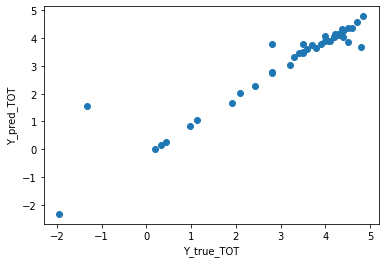

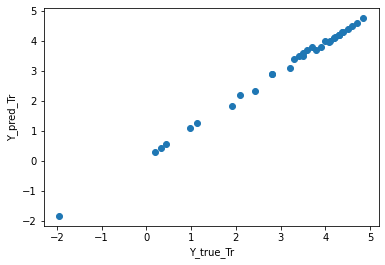

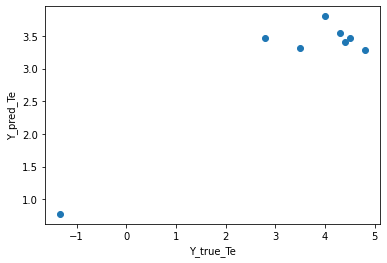

In [26]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_0, Y_GM_0_TR, X_GM_SCALED_Te_0, Y_GM_0_TE, X_GM_SCALED_TOT_0, Y_GM_0 ) 

0.144052125989835 0.2559261604413355 0.29356822117065406


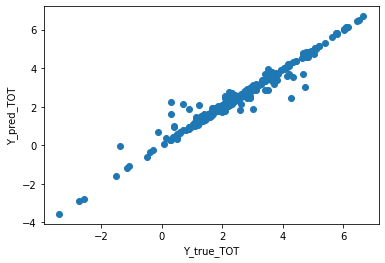

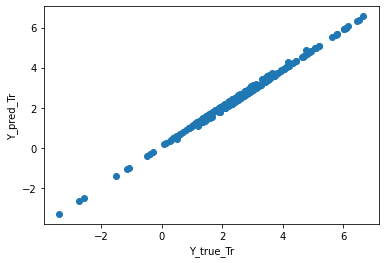

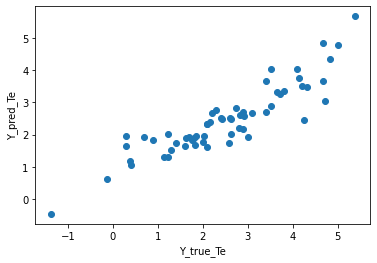

In [27]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_1, Y_GM_1_TR, X_GM_SCALED_Te_1, Y_GM_1_TE, X_GM_SCALED_TOT_1, Y_GM_1 ) 

0.17562714660683054 0.26998786916306544 0.3178104437322935


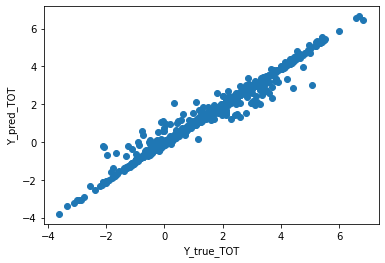

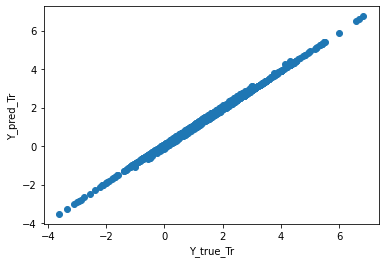

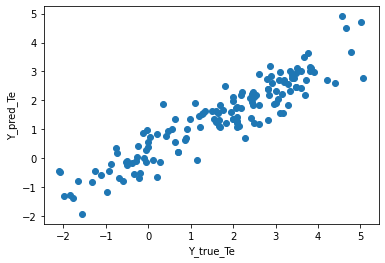

In [28]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_2, Y_GM_2_TR, X_GM_SCALED_Te_2, Y_GM_2_TE, X_GM_SCALED_TOT_2, Y_GM_2 ) 